# Loan Data Exploration 
## by Karim Henry

## Preliminary Wrangling

> This document explores a dataset containing amount, status , interest rate and other attributes for approximately 114,000 loans.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
whole_df=pd.read_csv('prosperLoanData.csv')

In [3]:
list(whole_df.columns.values) 

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

***For simplicity, I am gonna reduce the data set to approximately 20 fearures for every input***

In [4]:
index_col=['ListingNumber']
cat_col=['CreditGrade','LoanStatus','ProsperScore','BorrowerState','ListingCategory (numeric)','EmploymentStatus','IncomeVerifiable']
num_col=['Term','BorrowerAPR','Investors','Recommendations','MonthlyLoanPayment','LoanOriginalAmount','DebtToIncomeRatio','AvailableBankcardCredit','AmountDelinquent','CreditScoreRangeLower','CreditScoreRangeUpper','IncomeRange','BorrowerRate']

In [5]:
new_cols=index_col+cat_col+num_col
red_df=whole_df[new_cols]
red_df.head()

,ListingNumber,CreditGrade,LoanStatus,ProsperScore,BorrowerState,ListingCategory (numeric),EmploymentStatus,IncomeVerifiable,Term,BorrowerAPR,...,Recommendations,MonthlyLoanPayment,LoanOriginalAmount,DebtToIncomeRatio,AvailableBankcardCredit,AmountDelinquent,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,BorrowerRate
0,193129,C,Completed,NaN,CO,0,Self-employed,True,36,0.16516,...,0,330.43,9425,0.17,1500.0,472.0,640.0,659.0,"$25,000-49,999",0.1580
1,1209647,NaN,Current,7.0,CO,2,Employed,True,36,0.12016,...,0,318.93,10000,0.18,10266.0,0.0,680.0,699.0,"$50,000-74,999",0.0920
2,81716,HR,Completed,NaN,GA,0,Not available,True,36,0.28269,...,0,123.32,3001,0.06,NaN,NaN,480.0,499.0,Not displayed,0.2750
3,658116,NaN,Current,9.0,GA,16,Employed,True,36,0.12528,...,0,321.45,10000,0.15,30754.0,10056.0,800.0,819.0,"$25,000-49,999",0.0974
4,909464,NaN,Current,4.0,MN,2,Employed,True,36,0.24614,...,0,563.97,15000,0.26,695.0,0.0,680.0,699.0,"$100,000+",0.2085


> Interest rate refers to the annual cost of a loan to a borrower and is expressed as a percentage
APR is the annual cost of a loan to a borrower — including fees. Like an interest rate, the APR is expressed as a percentage. Unlike an interest rate, however, it includes other charges or fees such as mortgage insurance, most closing costs, discount points and loan origination fees.
Why the difference? The APR is intended to give you more information about what you’re really paying. The Federal Truth in Lending Act requires that every consumer loan agreement disclose the APR. Since all lenders must follow the same rules to ensure the accuracy of the APR, borrowers can use the APR as a good basis for comparing certain costs of loans.

In [6]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   CreditGrade                28953 non-null   object 
 2   LoanStatus                 113937 non-null  object 
 3   ProsperScore               84853 non-null   float64
 4   BorrowerState              108422 non-null  object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   EmploymentStatus           111682 non-null  object 
 7   IncomeVerifiable           113937 non-null  bool   
 8   Term                       113937 non-null  int64  
 9   BorrowerAPR                113912 non-null  float64
 10  Investors                  113937 non-null  int64  
 11  Recommendations            113937 non-null  int64  
 12  MonthlyLoanPayment         113937 non-null  float64
 13  LoanOriginalAmount         11

In [7]:
red_df.describe()

,ListingNumber,ProsperScore,ListingCategory (numeric),Term,BorrowerAPR,Investors,Recommendations,MonthlyLoanPayment,LoanOriginalAmount,DebtToIncomeRatio,AvailableBankcardCredit,AmountDelinquent,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerRate
count,1.139370e+05,84853.000000,113937.000000,113937.000000,113912.000000,113937.000000,113937.000000,113937.000000,113937.00000,105383.000000,106393.000000,106315.000000,113346.000000,113346.000000,113937.000000
mean,6.278857e+05,5.950067,2.774209,40.830248,0.218828,80.475228,0.048027,272.475783,8337.01385,0.275947,11210.225447,984.507059,685.567731,704.567731,0.192764
std,3.280762e+05,2.376501,3.996797,10.436212,0.080364,103.239020,0.332353,192.697812,6245.80058,0.551759,19818.361309,7158.270157,66.458275,66.458275,0.074818
min,4.000000e+00,1.000000,0.000000,12.000000,0.006530,1.000000,0.000000,0.000000,1000.00000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,4.009190e+05,4.000000,1.000000,36.000000,0.156290,2.000000,0.000000,131.620000,4000.00000,0.140000,880.000000,0.000000,660.000000,679.000000,0.134000
50%,6.005540e+05,6.000000,1.000000,36.000000,0.209760,44.000000,0.000000,217.740000,6500.00000,0.220000,4100.000000,0.000000,680.000000,699.000000,0.184000
75%,8.926340e+05,8.000000,3.000000,36.000000,0.283810,115.000000,0.000000,371.580000,12000.00000,0.320000,13180.000000,0.000000,720.000000,739.000000,0.250000
max,1.255725e+06,11.000000,20.000000,60.000000,0.512290,1189.000000,39.000000,2251.510000,35000.00000,10.010000,646285.000000,463881.000000,880.000000,899.000000,0.497500


In [8]:
red_df.dtypes

ListingNumber                  int64
CreditGrade                   object
LoanStatus                    object
ProsperScore                 float64
BorrowerState                 object
ListingCategory (numeric)      int64
EmploymentStatus              object
IncomeVerifiable                bool
Term                           int64
BorrowerAPR                  float64
Investors                      int64
Recommendations                int64
MonthlyLoanPayment           float64
LoanOriginalAmount             int64
DebtToIncomeRatio            float64
AvailableBankcardCredit      float64
AmountDelinquent             float64
CreditScoreRangeLower        float64
CreditScoreRangeUpper        float64
IncomeRange                   object
BorrowerRate                 float64
dtype: object

In [108]:
red_df['ProsperScore']=red_df['ProsperScore'].astype('object')

C:\Users\Karem\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
sum(red_df.duplicated())

0

In [10]:
red_df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [11]:
index_names_nc = red_df[ red_df['CreditGrade'] == 'NC' ].index
red_df.drop(index_names_nc, inplace = True)

C:\Users\Karem\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
red_df.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [13]:
red_df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7600
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [14]:
red_df.LoanStatus.value_counts()

Current                   56576
Completed                 38032
Chargedoff                11957
Defaulted                  4954
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [15]:
new= red_df["LoanStatus"].str.split("(", n = 1, expand = True) 
red_df["Status"]= new[0]


C:\Users\Karem\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
index_names = red_df[ red_df['IncomeRange'] == 'Not employed' ].index
red_df.drop(index_names, inplace = True)

In [17]:
ordinal_var_dict = {'ProsperScore': [1,2,3,4,5,6,7,8,9,10,11],
                    'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                    'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
                   'Term':[12,36,60]}
                   
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_var_dict[var])
    red_df[var] = red_df[var].astype(ordered_var)

C:\Users\Karem\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


> In prosper score, we indicate customer riskwith range from 1 to 11 with 1 being the worst, highest risk.

> In CreditGrade, AA indicates lower risk while HR indicates highest risk.

In [18]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112990 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ListingNumber              112990 non-null  int64   
 1   CreditGrade                28655 non-null   category
 2   LoanStatus                 112990 non-null  object  
 3   ProsperScore               84204 non-null   category
 4   BorrowerState              107554 non-null  object  
 5   ListingCategory (numeric)  112990 non-null  int64   
 6   EmploymentStatus           110777 non-null  object  
 7   IncomeVerifiable           112990 non-null  bool    
 8   Term                       112990 non-null  category
 9   BorrowerAPR                112966 non-null  float64 
 10  Investors                  112990 non-null  int64   
 11  Recommendations            112990 non-null  int64   
 12  MonthlyLoanPayment         112990 non-null  float64 
 13  LoanOriginalAm

In [18]:
red_df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5248
Other             3806
Part-time         1088
Retired            795
Not employed        29
Name: EmploymentStatus, dtype: int64

In [19]:
red_df.drop(red_df.query('EmploymentStatus in ["Not available"]').index,inplace = True)


In [20]:
print(red_df['LoanOriginalAmount'].isnull().sum())
print(red_df['CreditScoreRangeLower'].isnull().sum())
print(red_df['CreditScoreRangeLower'].mean())

0
578
689.9550222089508


In [21]:
red_df['CreditScoreRangeLower'].fillna(689.9550222089508,inplace=True) 
red_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107742 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ListingNumber              107742 non-null  int64   
 1   CreditGrade                23407 non-null   category
 2   LoanStatus                 107742 non-null  object  
 3   ProsperScore               84204 non-null   category
 4   BorrowerState              104662 non-null  object  
 5   ListingCategory (numeric)  107742 non-null  int64   
 6   EmploymentStatus           105529 non-null  object  
 7   IncomeVerifiable           107742 non-null  bool    
 8   Term                       107742 non-null  category
 9   BorrowerAPR                107718 non-null  float64 
 10  Investors                  107742 non-null  int64   
 11  Recommendations            107742 non-null  int64   
 12  MonthlyLoanPayment         107742 non-null  float64 
 13  LoanOriginalAm

C:\Users\Karem\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#### Counting Missing Data ####

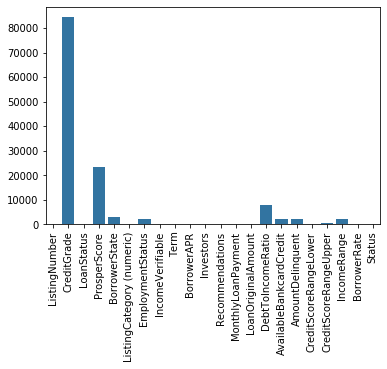

In [22]:
na_counts = red_df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color);
plt.xticks(rotation=90);

> We must take into account that using credit grade or prosper score can be not representative for the whole dataset due to large number of missing data.

### What is the structure of your dataset?

There are 112,990 loans in the dataaset with 20 features ( listing number, Credit Grade,Loan Status, Prosper Score, Listing Category (numeric), Employment Status,Term, Borrower APR, Investors, Recommendations, Monthly Loan Payment, Loan Original Amount, Debt To Income Ratio, Available Bank card Credit, Amount Delinquent, Credit Score Range Lower, Credit Score Range Upper, Income Range, Income Verifiable,borrower interest rate). Part of data is numerical as borrower interest rate and monthly loan payment and part of data is presented as ordered level:

Prosper score : 1 (highest risk) ----->  11 (lowest risk)

Credit Grade : AA (loweST risk), B, C, D, E, HR (highest risk)

Income Range :  0 ------> 100000+

### What is/are the main feature(s) of interest in your dataset?

We are dealing with 20 features whereby we will explore which of these features are impacting loan status which could be helpful in predicting future behavior of investors. Also, we will investigate the factors affecting interest rate and APR. Finally, we will try to understand whether there are differences between loans depending on their amounts.   

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that debt to income ratio along with credit grade & score will have greatest impact on loan status.Also, prosper score and credit grade when combined with loan amount could affect interest rate whereby as amount increase, interest rate decrease. Investigating of other features could lead to different results. 


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

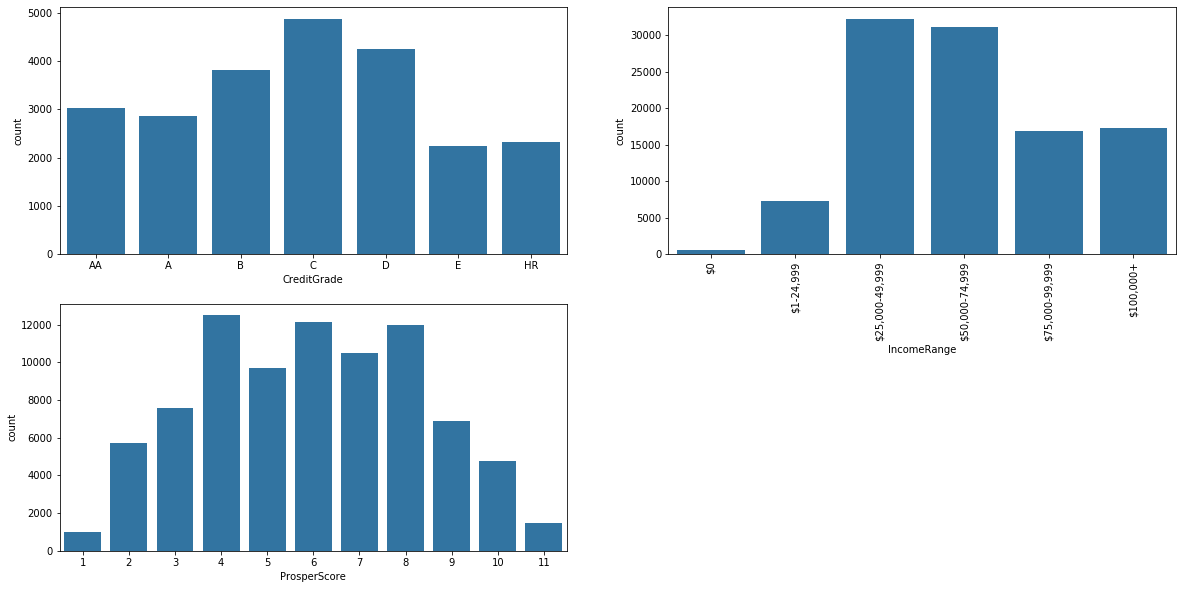

In [24]:
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
base_color = sb.color_palette()[0]
sb.countplot(data = red_df, x = 'CreditGrade', color = base_color);
plt.subplot(2,2,2)
sb.countplot(data = red_df, x = 'IncomeRange', color = base_color);
plt.xticks(rotation=90);
plt.subplot(2,2,3)
sb.countplot(data = red_df, x = 'ProsperScore', color = base_color);


> The above figures implies that majority of clients' income range is between  25k and 75k. Regarding the credit grade, most clients are receiving grade C implying moderate risk factor. Also, prosper score lies between 4 and 8 with three peaks at 4,6,8. However, we must be careful that credit grade is the credit rating that was assigned at the time the listing went live and is applicable for listings pre-2009 period and will only be populated for those listings so it may be not representative for the whole dataset.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

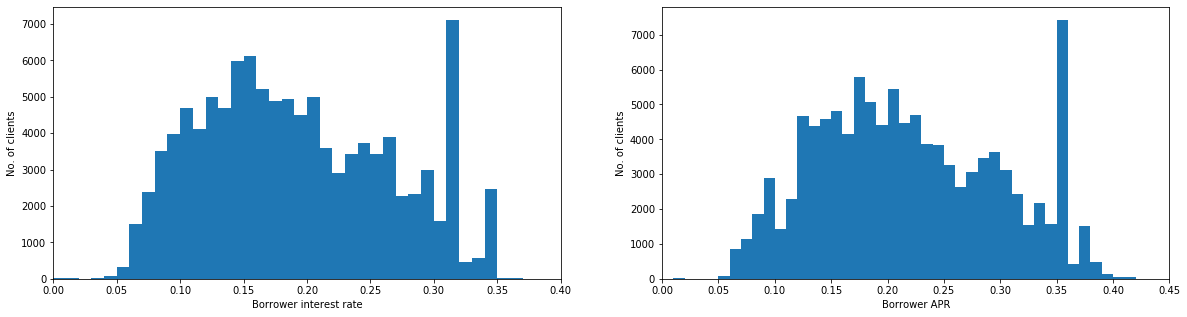

In [25]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
bins=np.arange(0,red_df.BorrowerRate.max()+0.01,0.01);
plt.hist(data=red_df,x='BorrowerRate',bins=bins);
plt.xlabel('Borrower interest rate');
plt.ylabel('No. of clients');
plt.xlim(0,0.4);
plt.subplot(1,2,2)
bins=np.arange(0,red_df.BorrowerAPR.max()+0.01,0.01);
plt.hist(data=red_df,x='BorrowerAPR',bins=bins);
plt.xlabel('Borrower APR');
plt.ylabel('No. of clients');
plt.xlim(0,0.45);

> As we have noted the difference between interest rate and APR, the data in APR is shifted to the right to somehow higher values. The 2 figures show there is a peak at interest rate beween 0.12 up to 0.18 with an abrupt increase in interest rate at 0.32, maybe it is attributed to a certain condition or loan amount. Investigating interest along with other data will reveal somehow a better understanding.

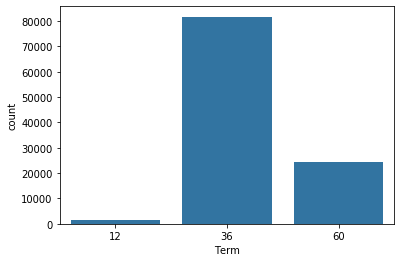

In [26]:
base_color = sb.color_palette()[0]
sb.countplot(data=red_df,x='Term',color=base_color);


> Majority prefer length of loan of 36 months.

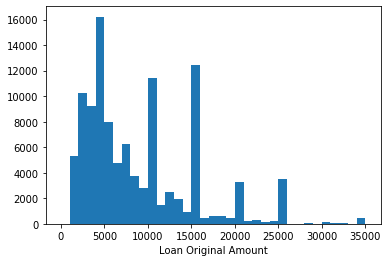

In [27]:
bins=np.arange(0,red_df.LoanOriginalAmount.max()+1000,1000);
plt.hist(data=red_df,x='LoanOriginalAmount',bins=bins);
plt.xlabel('Loan Original Amount');

> Loan original amount is somehow skewed to the right so we will be applying logarithmic transformation.

In [28]:
np.log10(red_df['LoanOriginalAmount']).describe()

count    107741.000000
mean          3.807902
std           0.340725
min           3.000000
25%           3.602060
50%           3.845098
75%           4.079181
max           4.544068
Name: LoanOriginalAmount, dtype: float64

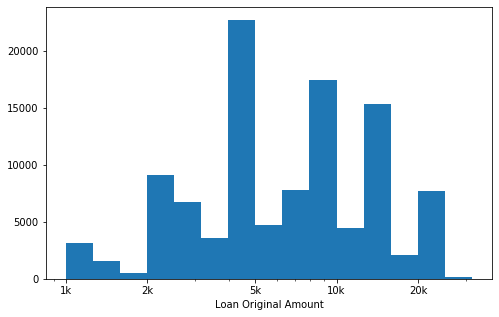

In [29]:
bins = 10 ** np.arange(3,4.5+0.1,0.1 )

plt.figure(figsize=[8, 5])
plt.hist(data = red_df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([ 1e3, 2e3, 5e3, 1e4, 2e4], ['1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Loan Original Amount')
plt.show()

> Transformation adjusts skewness but we are seeing increase in amount reaching a peak at approximately 4k then decrease. The ups and downs may be attributed to the fact that more clients prefer amounts of 1k and its multiples. 

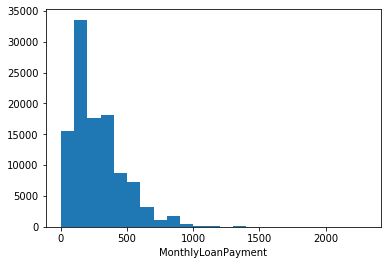

In [30]:
bins=np.arange(0,red_df.MonthlyLoanPayment.max()+100,100);
plt.hist(data=red_df,x='MonthlyLoanPayment',bins=bins);
plt.xlabel('MonthlyLoanPayment');

> As before,we will be applying logarithmic transformation as monthly payment is somehow long-tailed.

In [31]:
print(np.log10(red_df['MonthlyLoanPayment']).describe())
print(np.log10(0.01))

count    1.077410e+05
mean             -inf
std               NaN
min              -inf
25%      2.136657e+00
50%      2.354454e+00
75%      2.575165e+00
max      3.352474e+00
Name: MonthlyLoanPayment, dtype: float64
-2.0


C:\Users\Karem\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


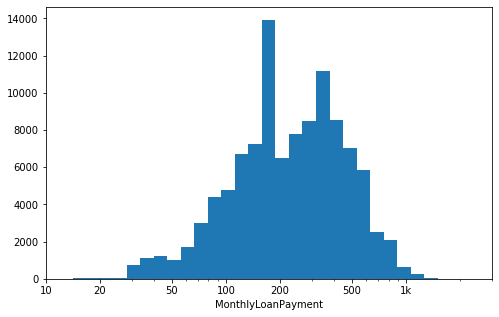

In [32]:
bins = 10 ** np.arange(-2,3.3+0.075,0.075 )

plt.figure(figsize=[8, 5])
plt.hist(data = red_df, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xlim(10,3000)
plt.xticks([ 1e1,2e1 ,5e1, 1e2,2e2,5e2, 1e3], ['10','20','50', '100','200','500', '1k'])
plt.xlabel('MonthlyLoanPayment')
plt.show()

> Log tranformation produces 2 peaks, one between 140 to 160 and another one between 300 and 400.

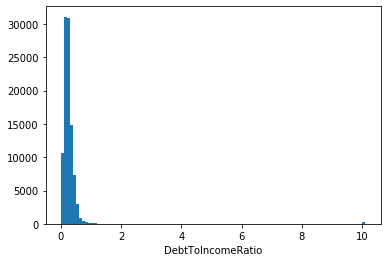

In [64]:
bins=np.arange(0,red_df.DebtToIncomeRatio.max()+0.1,0.1);
plt.hist(data = red_df, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('DebtToIncomeRatio');

> Long tailed curve with values reaching 10 so we will be applying log transformation.

In [34]:
high_outliers = ((red_df['DebtToIncomeRatio'] > 4))
print(high_outliers.sum())
print(red_df.loc[high_outliers,:])

287
        ListingNumber CreditGrade  LoanStatus ProsperScore BorrowerState  \
22             706927         NaN     Current            2            NY   
226            104542           D   Completed          NaN            NY   
576            124494          AA   Completed          NaN            NC   
626            560943         NaN     Current            4            MA   
2155           458811         NaN   Completed            8            NY   
...               ...         ...         ...          ...           ...   
112712         266982           D  Chargedoff          NaN            MI   
112719         128481           E   Completed          NaN            TX   
113099         844455         NaN     Current            3            IN   
113258         627138         NaN   Defaulted            6            VA   
113626          31681           A   Completed          NaN           NaN   

        ListingCategory (numeric) EmploymentStatus  IncomeVerifiable Term  \
22    

In [108]:
np.log10(red_df.DebtToIncomeRatio).describe()

C:\Users\Karem\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    1.001310e+05
mean             -inf
std               NaN
min              -inf
25%     -8.239087e-01
50%     -6.575773e-01
75%     -4.948500e-01
max      1.000434e+00
Name: DebtToIncomeRatio, dtype: float64

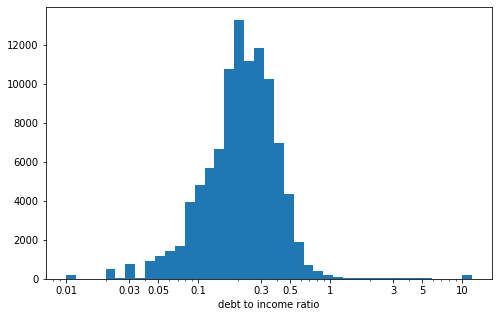

In [35]:
bins = 10 ** np.arange(-2,1+0.075,0.075 )

plt.figure(figsize=[8, 5])
plt.hist(data = red_df, x = 'DebtToIncomeRatio', bins = bins)
plt.xscale('log')
#plt.xlim(10,3000)
plt.xticks([ 1e-2,3e-2 ,5e-2, 1e-1,3e-1,5e-1, 1e0,3e0,5e0,1e1], ['0.01','0.03','0.05', '0.1','0.3','0.5', '1','3','5','10'])
plt.xlabel('debt to income ratio')
plt.show()

> log transormation produces a uniform model with peak at approximately 0.2.

In [36]:
red_df.drop(red_df[red_df['CreditScoreRangeLower']<=200].index,inplace=True)


C:\Users\Karem\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
red_df_debtto_inrat=red_df.query('DebtToIncomeRatio<4')
red_df_debtto_inrat.head()

,ListingNumber,CreditGrade,LoanStatus,ProsperScore,BorrowerState,ListingCategory (numeric),EmploymentStatus,IncomeVerifiable,Term,BorrowerAPR,...,MonthlyLoanPayment,LoanOriginalAmount,DebtToIncomeRatio,AvailableBankcardCredit,AmountDelinquent,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,BorrowerRate,Status
0,193129,C,Completed,NaN,CO,0,Self-employed,True,36,0.16516,...,330.43,9425,0.17,1500.0,472.0,640.0,659.0,"$25,000-49,999",0.1580,Completed
1,1209647,NaN,Current,7,CO,2,Employed,True,36,0.12016,...,318.93,10000,0.18,10266.0,0.0,680.0,699.0,"$50,000-74,999",0.0920,Current
3,658116,NaN,Current,9,GA,16,Employed,True,36,0.12528,...,321.45,10000,0.15,30754.0,10056.0,800.0,819.0,"$25,000-49,999",0.0974,Current
4,909464,NaN,Current,4,MN,2,Employed,True,36,0.24614,...,563.97,15000,0.26,695.0,0.0,680.0,699.0,"$100,000+",0.2085,Current
5,1074836,NaN,Current,10,NM,1,Employed,True,60,0.15425,...,342.37,15000,0.36,86509.0,0.0,740.0,759.0,"$100,000+",0.1314,Current


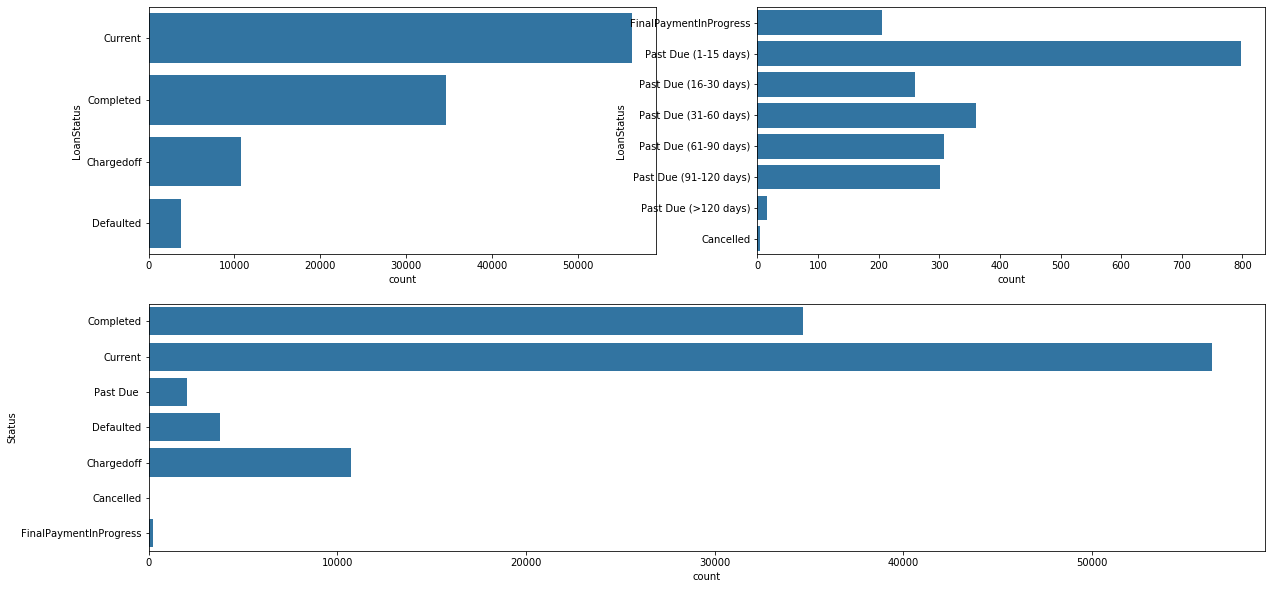

In [39]:
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
base_color = sb.color_palette()[0]
sb.countplot(data=red_df,y='LoanStatus',color=base_color, order=['Current','Completed','Chargedoff','Defaulted']);
plt.subplot(2,2,2)
sb.countplot(data=red_df,y='LoanStatus',color=base_color, order=['FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Cancelled']);
plt.subplot(2,1,2)
sb.countplot(data=red_df,y='Status',color=base_color);

> The above figures state that the majority of loans are current loans or completed loans. A small portion has passed the due date,majority of them are within the first 15 days after due date. Loan cancellation is the least loan status with approximately 5. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Loan amounts took on higher values at 1k and its multiples but in general these higher values keep increaing from 1k up to 5k then decreases to 20k on log scale. we have also applied logarithmic transformation to loan monthly payment which produces a bimodel. Debt to income ratio reflected outliers reaching very high values up 10. On log scale, it produced a uniform model with peak at approximately 0.2.  
 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Debt to income ratio reflected outliers reaching very high values up 10. On log scale, it produced a uniform model with peak at approximately 0.2. 

## Bivariate Exploration

In [40]:
index_col=['ListingNumber']
cat_col=['CreditGrade','LoanStatus','ProsperScore','BorrowerState',
         'ListingCategory (numeric)','EmploymentStatus','IncomeVerifiable']
num_col=['Term','BorrowerAPR','Investors','Recommendations','MonthlyLoanPayment',
         'LoanOriginalAmount','DebtToIncomeRatio','AvailableBankcardCredit','AmountDelinquent',
         'CreditScoreRangeLower','CreditScoreRangeUpper','IncomeRange','BorrowerRate']
corr_col=['DebtToIncomeRatio','BorrowerAPR','BorrowerRate','LoanOriginalAmount','MonthlyLoanPayment','AmountDelinquent',
          'CreditScoreRangeLower','CreditScoreRangeUpper','AvailableBankcardCredit']

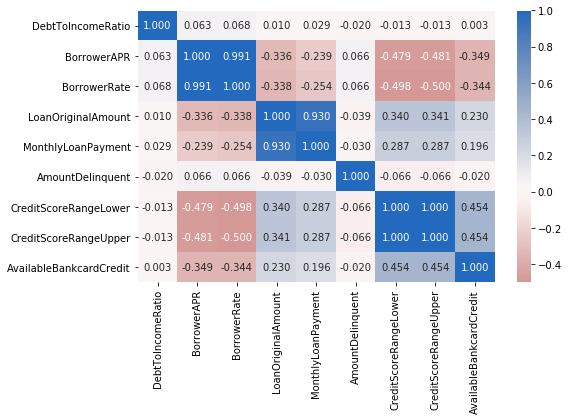

In [41]:
plt.figure(figsize = [8, 5])
sb.heatmap(red_df[corr_col].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

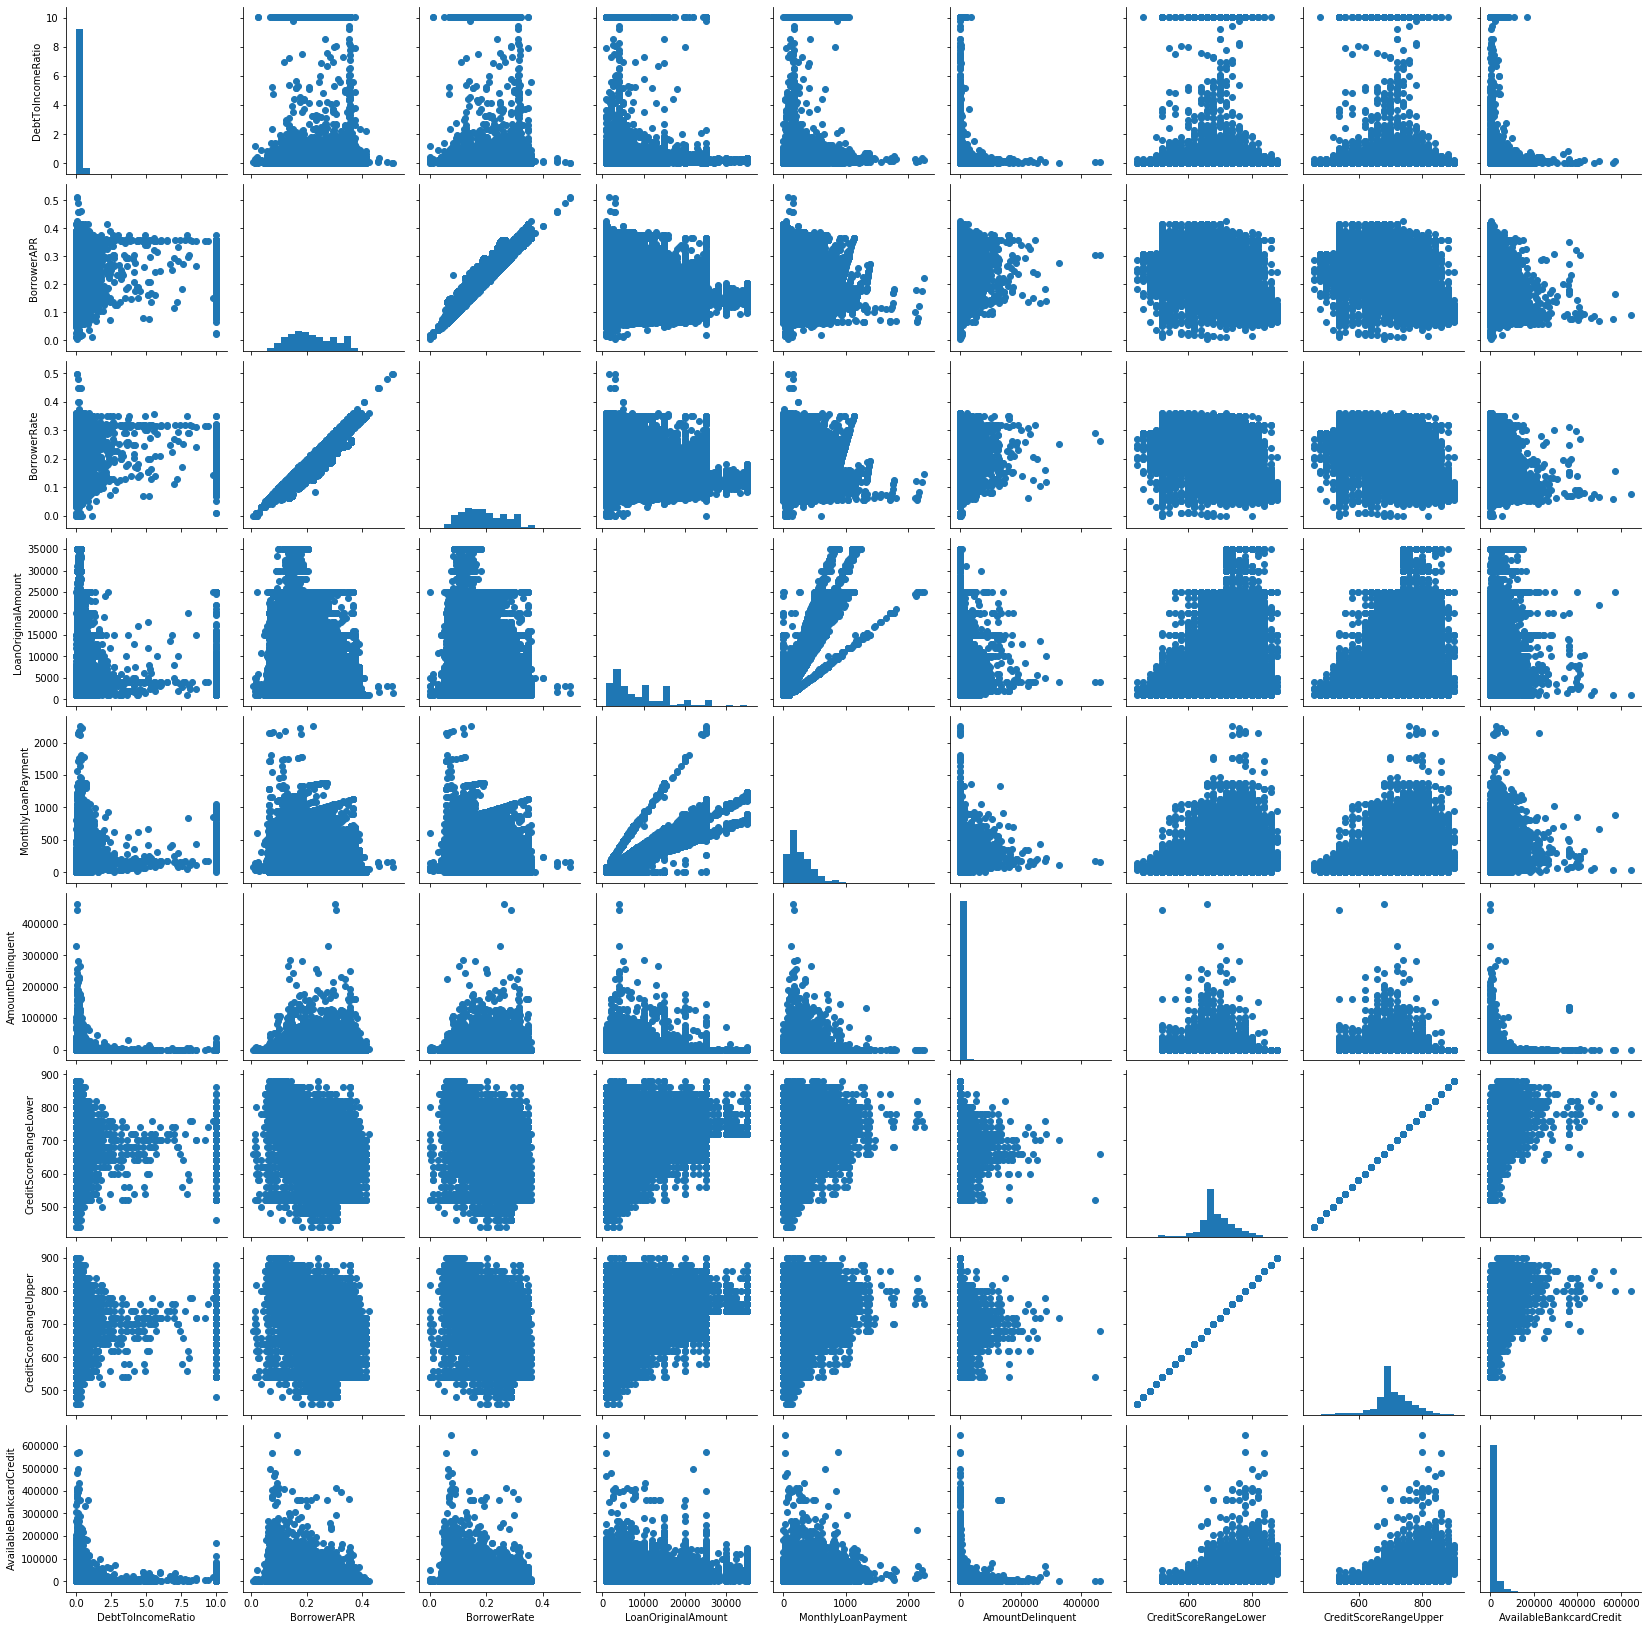

In [43]:
g = sb.PairGrid(data = red_df, vars = corr_col);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

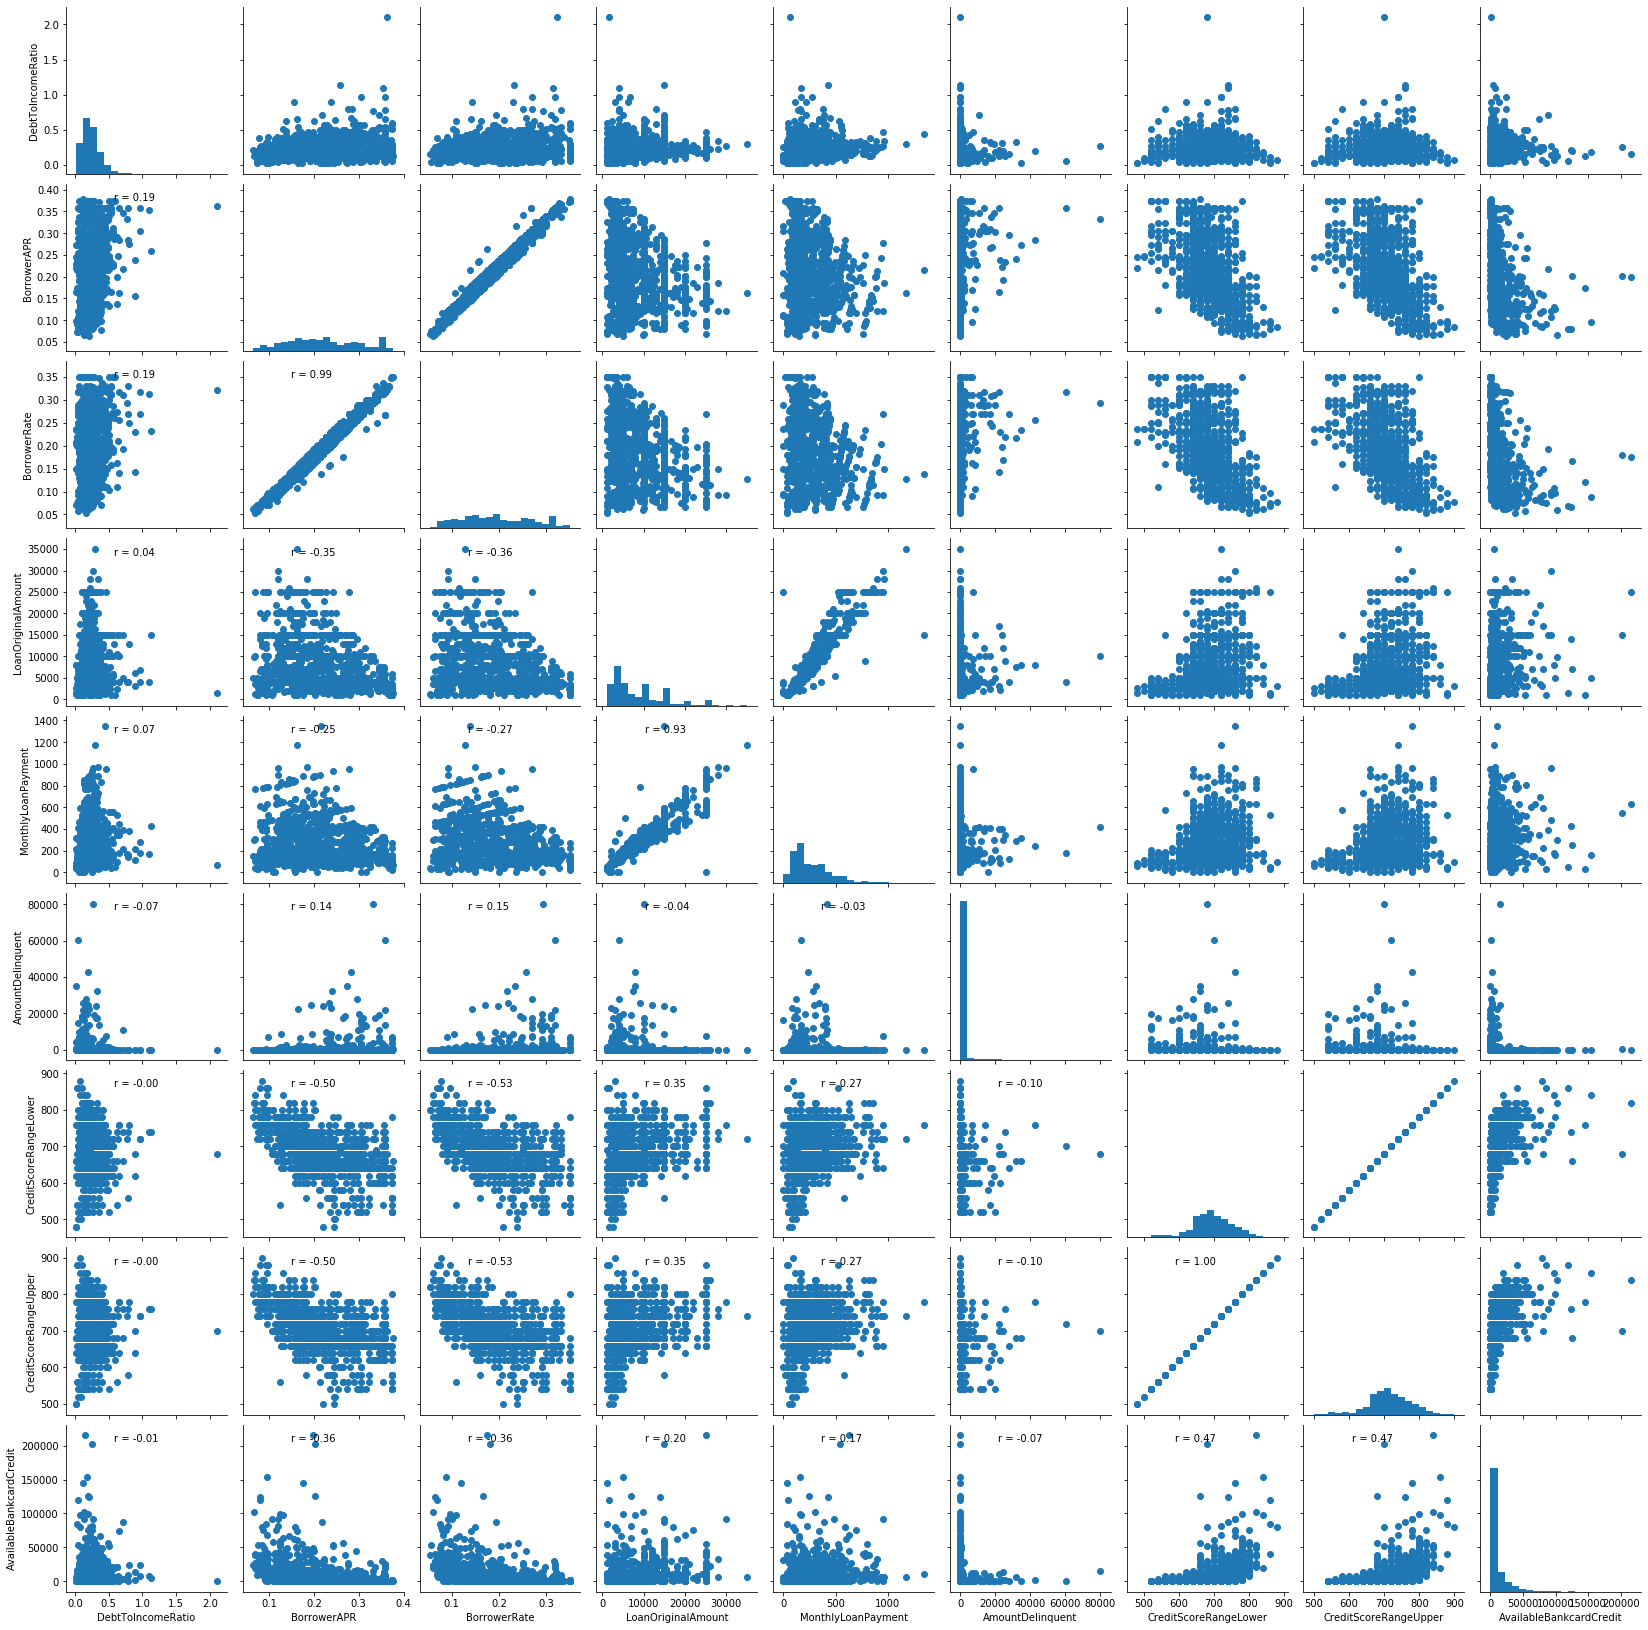

In [42]:
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),xy=(.3, .9), xycoords=ax.transAxes)
red_sample=red_df_debtto_inrat.sample(n=1000,axis=0,replace=False)
g = sb.PairGrid(data = red_sample, vars = corr_col);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);
g.map_lower(corrfunc);

> Taking a sample help reduce rendering time, simultaneously, gives clearer plots.

As expected monthly payment is highly correlated with loan original amount. Upper and lower credit scores are strongly correlated with each other. Relation between credit score and interest rate and loan amount needs further investigation. Higher available credit is associated with lower interest rate. Interest rate is strongly correlated with borrower APR.

C:\Users\Karem\anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


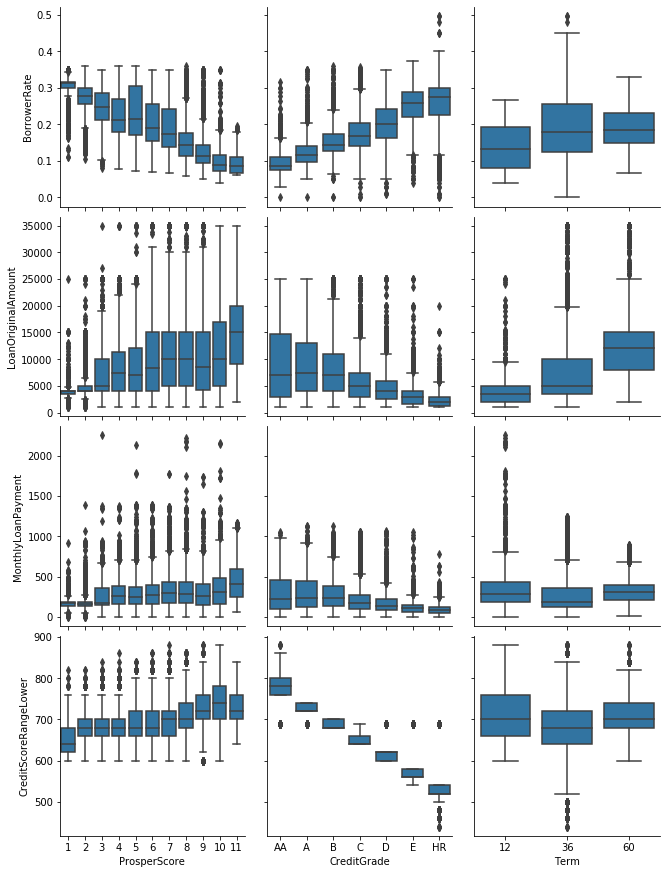

In [43]:
def boxgrid(x, y, **kwargs):
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color)

g = sb.PairGrid(data = red_df_debtto_inrat, y_vars = ['BorrowerRate', 'LoanOriginalAmount','MonthlyLoanPayment','CreditScoreRangeLower'], 
                x_vars = ['ProsperScore','CreditGrade','Term'],size = 3, aspect = 1,dropna=True)
g.map(boxgrid)
plt.show();


C:\Users\Karem\anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


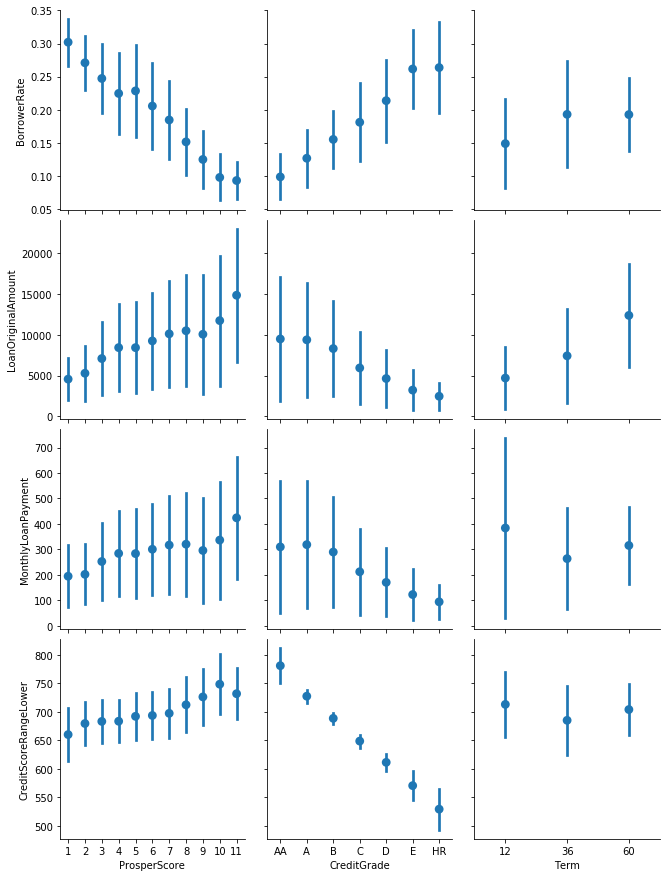

In [44]:
def pointgrid(x, y, **kwargs):
    base_color = sb.color_palette()[0]
    sb.pointplot(x, y, color = base_color,ci='sd',linestyles='')
    
g = sb.PairGrid(data = red_df, y_vars = ['BorrowerRate', 'LoanOriginalAmount','MonthlyLoanPayment','CreditScoreRangeLower'], 
                x_vars = ['ProsperScore','CreditGrade','Term'],size = 3, aspect = 1,dropna=True)
g.map(pointgrid)
plt.show();


>  It is obvious from the above plots that average interest rate decreases as risk decrease whereby lowest interest rate is associated with minimum risk.As expected,the average credit score is minimum at highest risk. Also, higher income ranges are associated with lower interest rate and somehow higher credit score. Concerning loan original amount, it increases at longer loan periods.Also greater loan amounts is achieved at higher income rates. Also, Loan original amount is greater for lower risk grades.

C:\Users\Karem\anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


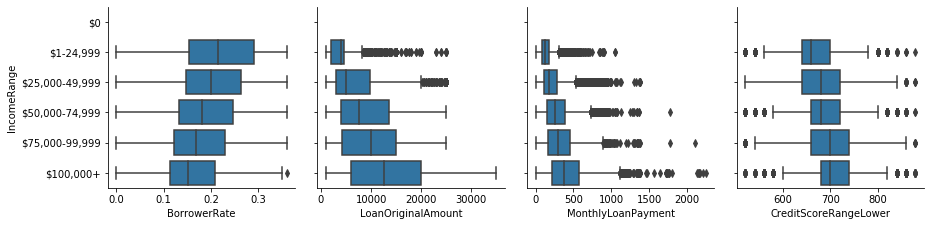

In [45]:
def boxgrid(x, y, **kwargs):
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color)
    
g = sb.PairGrid(data = red_df_debtto_inrat, x_vars = ['BorrowerRate', 'LoanOriginalAmount','MonthlyLoanPayment','CreditScoreRangeLower'], 
                y_vars = ['IncomeRange'],size = 3, aspect = 1,dropna=True)
g.map(boxgrid)

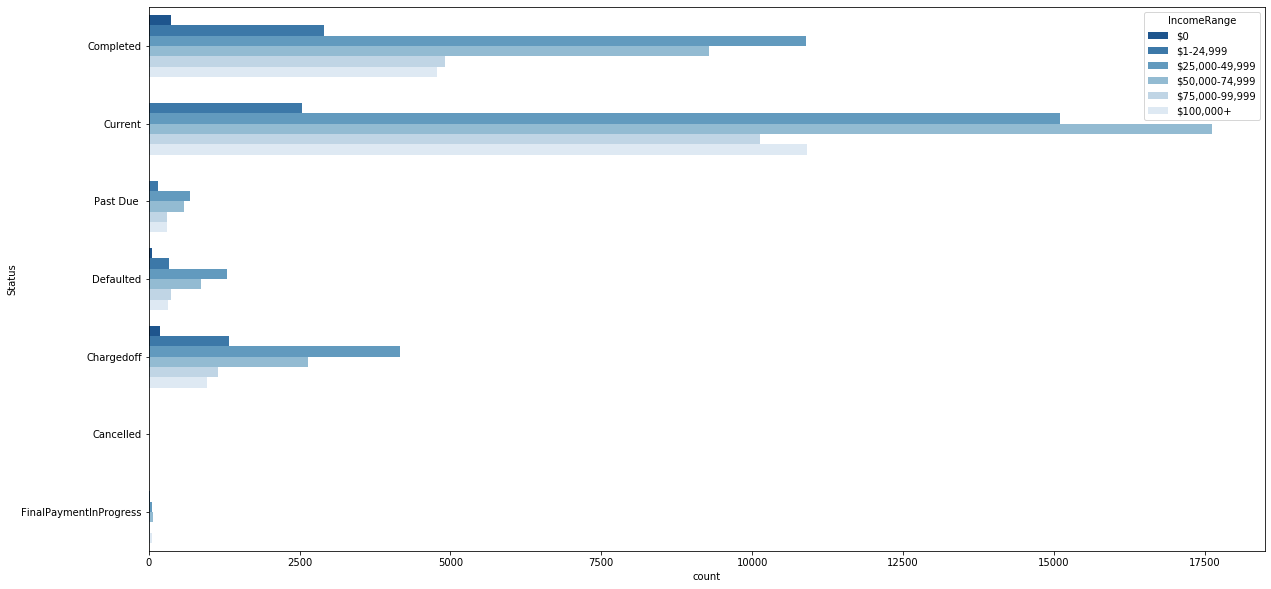

In [46]:
red_df_status1=red_df.query("LoanStatus in ['Current','Completed','Chargedoff','Defaulted']")
red_df_status2=red_df.query("LoanStatus in ['FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Cancelled']");

plt.figure(figsize=[20,10])
#plt.subplot(2,2,1)
sb.countplot(data = red_df, y = 'Status', hue = 'IncomeRange',palette ='Blues_r')#,order=['Current','Completed','Chargedoff','Defaulted'])
#plt.subplot(2,2,2)
#sb.countplot(data = red_df_status2, y = 'LoanStatus', hue = 'IncomeRange',palette ='Blues_r',order=['FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Cancelled']);
#plt.xlim(0,10)

> Be careful of different scale on 2 visualizations as number of completed, charged off and defaulted loans is high compared to other loan status. Generally, this visualiztions reflect different income ranges versus loan status whereby different loan status are expressing approximately same behavior with loan status producing peaks at income ranges 25k up to 49 k.

C:\Users\Karem\anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


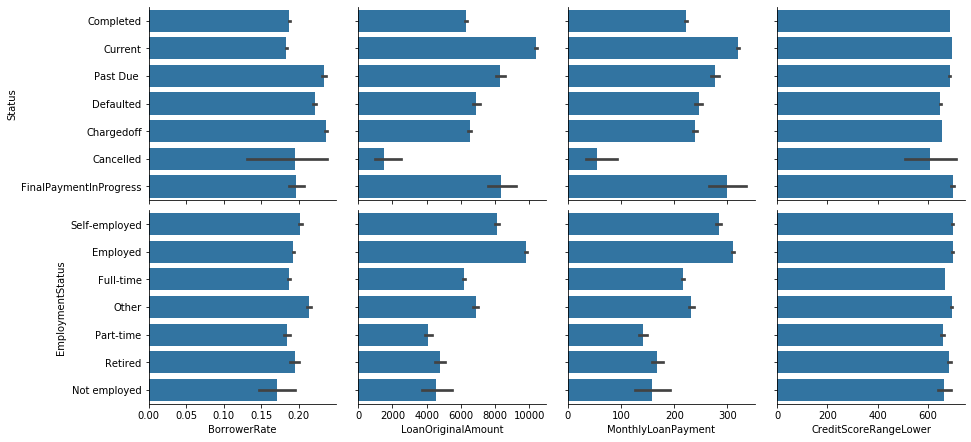

In [47]:
def bargrid(x, y, **kwargs):
    base_color = sb.color_palette()[0]
    sb.barplot(x, y, color = base_color)
g = sb.PairGrid(data = red_df, x_vars = ['BorrowerRate', 'LoanOriginalAmount','MonthlyLoanPayment','CreditScoreRangeLower'], 
            y_vars = ['Status','EmploymentStatus'],size = 3, aspect = 1,dropna=True)
g.map(bargrid)

> The average intersest rate in case past due, default or charged off exceeds 0.2, in addition interest rate reaches 0.25 for not employed. we have seen in previous figures interest rate is affected by credit grade and risk factor to a great extent. Cancelled loan are receiving lowest average loan amount. Larger loan amounts over a certain threshold are attributed to employed clients.

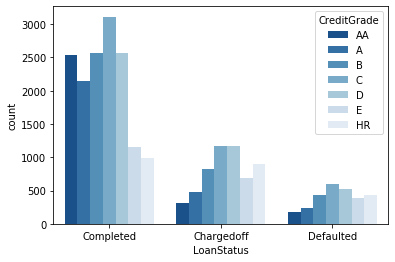

In [48]:
sb.countplot(data = red_df_status1, x = 'LoanStatus', hue = 'CreditGrade',palette ='Blues_r',order=['Completed','Chargedoff','Defaulted'])


> Completed loans are having greater AA grades with respect to other grades, in contrast to charged off and defaulted grades whereby AA grades are low compared to other grades.

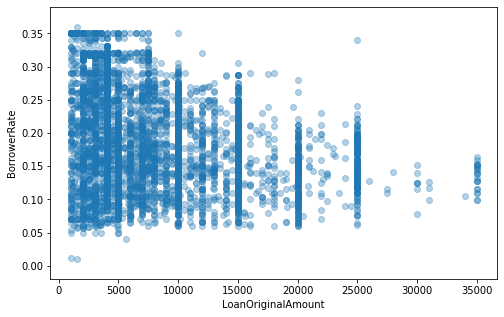

In [50]:
plt.figure(figsize = [8, 5])
plt.scatter(data = red_df.sample(5000,replace=False), y = 'BorrowerRate', x = 'LoanOriginalAmount', alpha = 1/3)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerRate')
plt.show()

> The above scatter can hardly be used to correlate the 2 variables but it suggests that higher loans are having somehow lower interest rate. Loan Period term could help better emphasize this relation. 

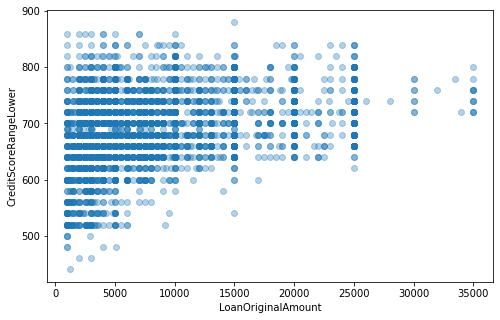

In [51]:
plt.figure(figsize = [8, 5])
plt.scatter(data = red_df.sample(5000,replace=False,random_state=26), y = 'CreditScoreRangeLower', x = 'LoanOriginalAmount', alpha = 1/3)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('CreditScoreRangeLower')
plt.show()


> As expected, greater loan amounts take place at higher credit score.

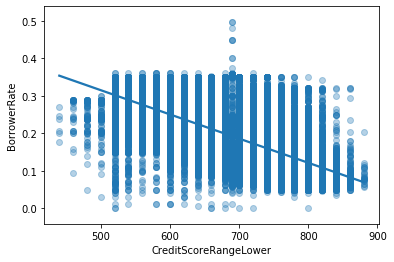

In [52]:
sb.regplot(data=red_df, x='CreditScoreRangeLower',y='BorrowerRate',
           scatter_kws={'alpha':1/3});

> This plot reflects that interest rate somehow decreases as credit score especially after a threshold score of approximately 800 whereby cloud of points decrease. 

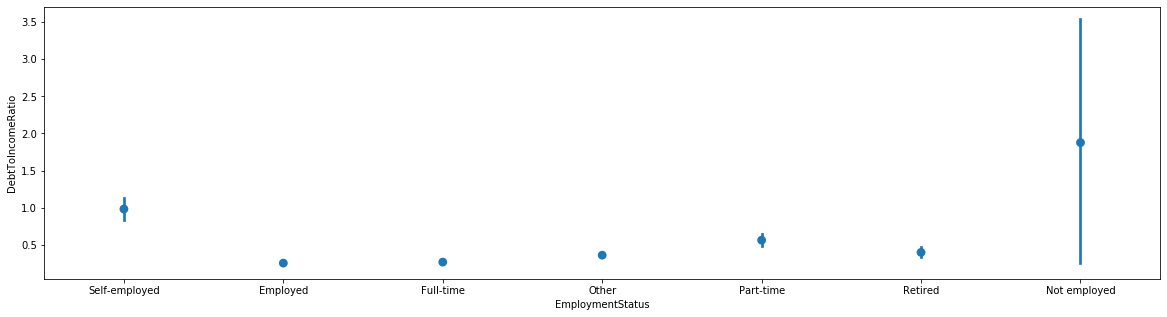

In [54]:
plt.figure(figsize=[20,5])
sb.pointplot(data = red_df, x = 'EmploymentStatus', y = 'DebtToIncomeRatio', linestyles = '');

> Debt to income rate reaches high values for non employed people hitting values of 3.5

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> our predictions concerning that interset rate would increase with time wasn't achieved as we can see through the box plot whereby average interest rate increased from 12 to 36 months but then remained within same range. Interest rate is somehow attributed to credit score. I think we will be introduced to new results with multivariable visualizations. The great number of features requires deeper investigations to be able to come with reliable results.Larger loan amounts over a certain threshold are attributed to employed clients.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I think we will be introduced to new results with multivariable visualizations. The great number of features requires deeper investigations to be able to come with reliable results.


## Multivariate Exploration


In [55]:
monthly_zero=red_df[red_df['MonthlyLoanPayment']==0]
monthly_zero.Status.value_counts()

Completed                 733
Defaulted                 109
FinalPaymentInProgress      4
Name: Status, dtype: int64

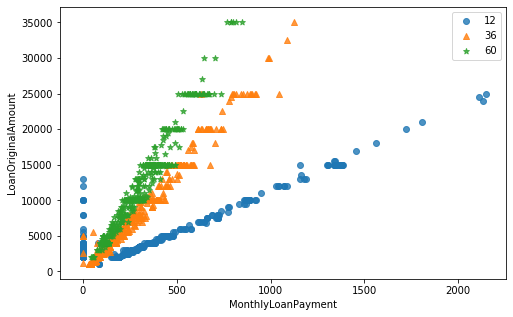

In [56]:
plt.figure(figsize=[8,5])
ttype_marker=[[12,'o'],[36,'^'],[60,'*']]
for ttype,marker in ttype_marker:
    plot_data=red_df.loc[red_df['Term']==ttype]
    sb.regplot(data=plot_data.sample(500,replace=False),x='MonthlyLoanPayment',y='LoanOriginalAmount'
                ,fit_reg=False,marker=marker)
               
plt.legend(['12','36','60']);    

> The above figure illustrates relation between monthly payment and loan amount in each of the loan periods whether 12,36 or 60 months. Monthly Payment is strongly correlated with original loan payment at 3 levels of loan period. for same loan amount, higher value of monthly payment  is seen for shorter period. The increase in monthly payment for same loan amount from 60  to 36 month is small compared to that between 36 and 12 month.

C:\Users\Karem\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


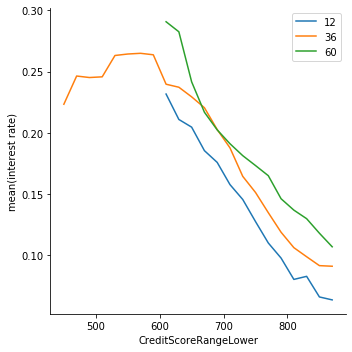

In [58]:
def mean_poly(x, y, bins = 10, **kwargs):
    
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    
    plt.errorbar(x = bin_centers, y = means, **kwargs)
bin_edges = np.arange(440, red_df['CreditScoreRangeLower'].max()+20, 20)
g = sb.FacetGrid(data = red_df, hue = 'Term', size = 5)
g.map(mean_poly, "CreditScoreRangeLower", "BorrowerRate", bins = bin_edges)
g.set_ylabels('mean(interest rate)')
plt.legend();

> The interst rate depends on credit score and on loan period whereby interest rate decrease from nearly 0.29 at score of 620 to about 0.12 at score of 850 for 60 months also interest rate is at lower levels for shorter loan periods at the smae scores whereby we can see, for instance, interest rate decreasing from 0.15 to 0.11 ending with values below 0.10 as period declines from 60 to 36 ending with 12 months.

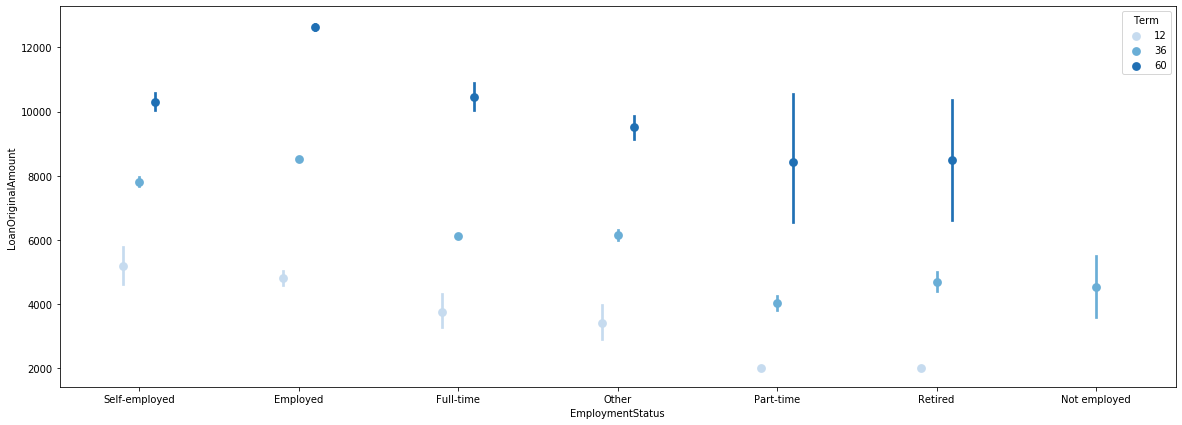

In [59]:
plt.figure(figsize = [20,7])
#plt.subplot(1,2,1)
sb.pointplot(data = red_df, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'Term',palette = 'Blues', 
             linestyles = '', dodge = 0.2)
#plt.subplot(1,2,2)
#plt.yscale('log')
plt.show();


> We can see that non employed people are not allowed long loan periods of 60 months, with smaller loan amounts with a maximum of 6000 dollars.  

In [60]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    ybin_edges = np.arange(1000, 37000, 2000)
    xbin_edges = np.arange(440,880+20, 20)
    
    plt.hist2d(x, y, bins = [xbin_edges, ybin_edges], cmap = palette, cmin = 0.5)
   

C:\Users\Karem\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


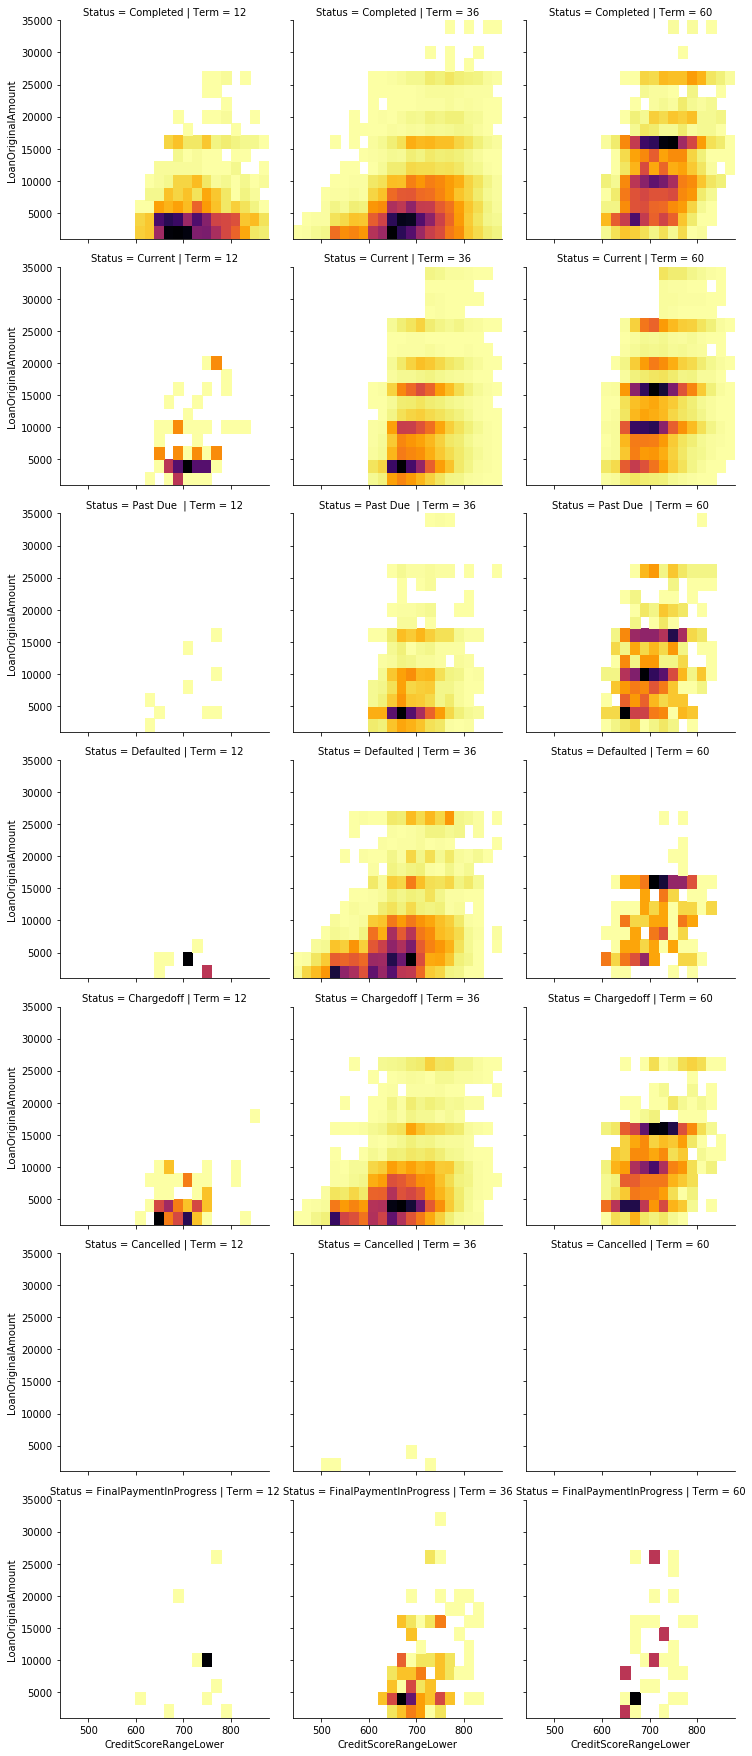

In [61]:
g = sb.FacetGrid(data = red_df, row = 'Status',col='Term' , size = 3.5)
g.map(hist2dgrid, 'CreditScoreRangeLower', 'LoanOriginalAmount', color = 'inferno_r')
#g.set_xlabels('Carat')
#g.set_ylabels('Price ($)')

plt.show()

> This grid shows that credit score can be very misleading in predicting loan status whereby all status occur at all ranges of credit score even the high scores which is surprising   

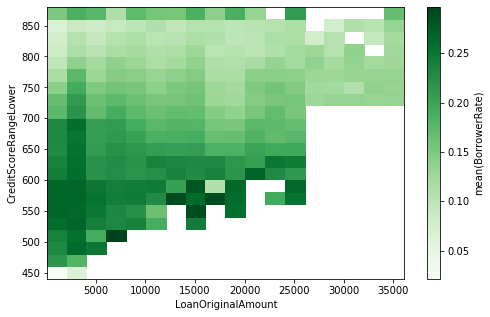

In [62]:
plt.figure(figsize=[8,5])
xbin_edges = np.arange(100, 37000, 2000)
ybin_edges = np.arange(440,880+20, 20)

xbin_idxs = pd.cut(red_df['LoanOriginalAmount'], xbin_edges, right = True,include_lowest = True, labels = False).astype(int)

ybin_idxs = pd.cut(red_df['CreditScoreRangeLower'], ybin_edges, right = True,include_lowest = True, labels = False).astype(int)

pts_per_bin = red_df.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'LoanOriginalAmount', columns = 'CreditScoreRangeLower').values

z_wts = red_df['BorrowerRate'] / pts_per_bin[xbin_idxs, ybin_idxs]

plt.hist2d(data = red_df, x = 'LoanOriginalAmount', y = 'CreditScoreRangeLower', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmap = 'Greens', cmin = 0.01);
plt.xlabel('LoanOriginalAmount')
plt.ylabel('CreditScoreRangeLower');
plt.colorbar(label = 'mean(BorrowerRate)');

> This map shows that higher loan amounts above 27k take place at  credit score of 720. Also, interest rate grades up towards higher credit scores.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Monthly Payment is strongly correlated with original loan payment at 3 levels of loan period. for same loan amount, higher value of monthly payment  is seen for shorter period. The increase in monthly payment for same loan amount from 60  to 36 month is small compared to that between 36 and 12 month. 

>The interst rate depends on credit score and on loan period whereby interest rate decrease from nearly 0.29 at score of 620 to about 0.12 at score of 850 for 60 months also interest rate is at lower levels for shorter loan periods at the smae scores whereby we can see, for instance, interest rate decreasing from 0.15 to 0.11 ending with values below 0.10 as period declines from 60 to 36 ending with 12 months.

> Higher loan amounts above 27k take place at credit score of 720. Also, interest rate grades up towards higher credit scores.

>Completed loans are having greater AA grades with respect to other grades, in contrast to charged off and defaulted grades whereby AA grades are low compared to other grades.

> Non employed people are not allowed long loan periods of 60 months, with smaller loan amounts with a maximum of 6000 dollars.  
### Were there any interesting or surprising interactions between features?

> The credit score can be very misleading in predicting loan status whereby all status occur at all ranges of credit score even the high scores which is surprising

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [65]:
jupyter nbconvert presentation.ipynb --to slides


SyntaxError: invalid syntax (<ipython-input-65-fff20cc9511d>, line 1)